#  Importing all the important Libraries

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib as plt
from sklearn.metrics import accuracy_score

In [8]:
# Creating the dataframe
df = pd.read_csv('bank-full.csv')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


               age   balance       day  duration  campaign     pdays  previous
age       1.000000  0.097783 -0.009120 -0.004648  0.004760 -0.023758  0.001288
balance   0.097783  1.000000  0.004503  0.021560 -0.014578  0.003435  0.016674
day      -0.009120  0.004503  1.000000 -0.030206  0.162490 -0.093044 -0.051710
duration -0.004648  0.021560 -0.030206  1.000000 -0.084570 -0.001565  0.001203
campaign  0.004760 -0.014578  0.162490 -0.084570  1.000000 -0.088628 -0.032855
pdays    -0.023758  0.003435 -0.093044 -0.001565 -0.088628  1.000000  0.454820
previous  0.001288  0.016674 -0.051710  0.001203 -0.032855  0.454820  1.000000


<module 'matplotlib' from 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\matplotlib\\__init__.py'>

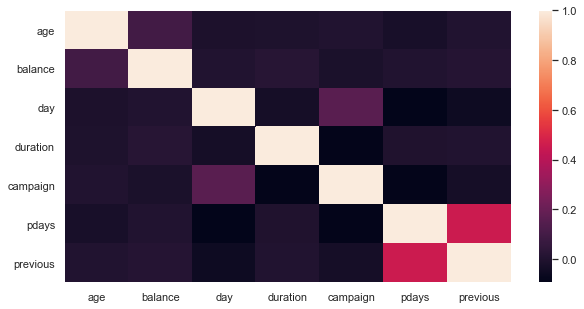

In [9]:
corr = df.corr();
print(corr)
sns.set(rc = {'figure.figsize':(10,5)})
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns)
plt

#  Data Preprocessing

In [10]:
# Check for null values
df.isnull().values.any()

False

In [13]:
# Statistics of the dataset

df.describe()


,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [14]:
df.shape

(45211, 17)

In [15]:
df.y.unique()

array(['no', 'yes'], dtype=object)

#  Creating the Dummies 
       
       In our dataset, we have categorical data which we will convert it into numerical data
       we will convert each categorical value to boolean, that is 0 and 1

In [16]:
education = pd.get_dummies(df['education'])
education.head()

,primary,secondary,tertiary,unknown
0,0,0,1,0
1,0,1,0,0
2,0,1,0,0
3,0,0,0,1
4,0,0,0,1


In [17]:
job = pd.get_dummies(df['job'])
job.head()

,admin.,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,unknown
0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,0,0
2,0,0,1,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,1


In [18]:
marital = pd.get_dummies(df['marital'])
marital.head()

,divorced,married,single
0,0,1,0
1,0,0,1
2,0,1,0
3,0,1,0
4,0,0,1


In [19]:
poutcome = pd.get_dummies(df['poutcome'])
poutcome.head()

,failure,other,success,unknown
0,0,0,0,1
1,0,0,0,1
2,0,0,0,1
3,0,0,0,1
4,0,0,0,1


In [20]:
merged = pd.concat([df,education,job,marital,poutcome], axis = 1)
merged.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,...,technician,unemployed,unknown,divorced,married,single,failure,other,success,unknown
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,...,0,0,0,0,1,0,0,0,0,1
1,44,technician,single,secondary,no,29,yes,no,unknown,5,...,1,0,0,0,0,1,0,0,0,1
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,...,0,0,0,0,1,0,0,0,0,1
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,...,0,0,0,0,1,0,0,0,0,1
4,33,unknown,single,unknown,no,1,no,no,unknown,5,...,0,0,1,0,0,1,0,0,0,1


In [21]:
df1 = merged.drop(['marital','contact','day','month','poutcome','education','job'], axis = 1)
df1.head()

,age,default,balance,housing,loan,duration,campaign,pdays,previous,y,...,technician,unemployed,unknown,divorced,married,single,failure,other,success,unknown
0,58,no,2143,yes,no,261,1,-1,0,no,...,0,0,0,0,1,0,0,0,0,1
1,44,no,29,yes,no,151,1,-1,0,no,...,1,0,0,0,0,1,0,0,0,1
2,33,no,2,yes,yes,76,1,-1,0,no,...,0,0,0,0,1,0,0,0,0,1
3,47,no,1506,yes,no,92,1,-1,0,no,...,0,0,0,0,1,0,0,0,0,1
4,33,no,1,no,no,198,1,-1,0,no,...,0,0,1,0,0,1,0,0,0,1


In [22]:
#The default column have yes/no, we will convert it into (0 = no) and (1 = yes)

df1['default'] = df1['default'].map({'yes': 1, 'no': 0})
df1

<ipython-input-22-536cbe02cdd2>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['default'] = df1['default'].map({'yes': 1, 'no': 0})


,age,default,balance,housing,loan,duration,campaign,pdays,previous,y,...,technician,unemployed,unknown,divorced,married,single,failure,other,success,unknown
0,58,0,2143,yes,no,261,1,-1,0,no,...,0,0,0,0,1,0,0,0,0,1
1,44,0,29,yes,no,151,1,-1,0,no,...,1,0,0,0,0,1,0,0,0,1
2,33,0,2,yes,yes,76,1,-1,0,no,...,0,0,0,0,1,0,0,0,0,1
3,47,0,1506,yes,no,92,1,-1,0,no,...,0,0,0,0,1,0,0,0,0,1
4,33,0,1,no,no,198,1,-1,0,no,...,0,0,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,0,825,no,no,977,3,-1,0,yes,...,1,0,0,0,1,0,0,0,0,1
45207,71,0,1729,no,no,456,2,-1,0,yes,...,0,0,0,1,0,0,0,0,0,1
45208,72,0,5715,no,no,1127,5,184,3,yes,...,0,0,0,0,1,0,0,0,1,0
45209,57,0,668,no,no,508,4,-1,0,no,...,0,0,0,0,1,0,0,0,0,1


In [23]:
# convert housing into 0 and 1
df1['housing'] = df1['housing'].map({'yes': 1, 'no': 0})
df1

<ipython-input-23-b117a76bf1f6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['housing'] = df1['housing'].map({'yes': 1, 'no': 0})


,age,default,balance,housing,loan,duration,campaign,pdays,previous,y,...,technician,unemployed,unknown,divorced,married,single,failure,other,success,unknown
0,58,0,2143,1,no,261,1,-1,0,no,...,0,0,0,0,1,0,0,0,0,1
1,44,0,29,1,no,151,1,-1,0,no,...,1,0,0,0,0,1,0,0,0,1
2,33,0,2,1,yes,76,1,-1,0,no,...,0,0,0,0,1,0,0,0,0,1
3,47,0,1506,1,no,92,1,-1,0,no,...,0,0,0,0,1,0,0,0,0,1
4,33,0,1,0,no,198,1,-1,0,no,...,0,0,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,0,825,0,no,977,3,-1,0,yes,...,1,0,0,0,1,0,0,0,0,1
45207,71,0,1729,0,no,456,2,-1,0,yes,...,0,0,0,1,0,0,0,0,0,1
45208,72,0,5715,0,no,1127,5,184,3,yes,...,0,0,0,0,1,0,0,0,1,0
45209,57,0,668,0,no,508,4,-1,0,no,...,0,0,0,0,1,0,0,0,0,1


In [24]:
# convert loan into 0 and 1
df1['loan'] = df1['loan'].map({'yes': 1, 'no': 0})
df1

<ipython-input-24-41ce665729a2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['loan'] = df1['loan'].map({'yes': 1, 'no': 0})


,age,default,balance,housing,loan,duration,campaign,pdays,previous,y,...,technician,unemployed,unknown,divorced,married,single,failure,other,success,unknown
0,58,0,2143,1,0,261,1,-1,0,no,...,0,0,0,0,1,0,0,0,0,1
1,44,0,29,1,0,151,1,-1,0,no,...,1,0,0,0,0,1,0,0,0,1
2,33,0,2,1,1,76,1,-1,0,no,...,0,0,0,0,1,0,0,0,0,1
3,47,0,1506,1,0,92,1,-1,0,no,...,0,0,0,0,1,0,0,0,0,1
4,33,0,1,0,0,198,1,-1,0,no,...,0,0,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,0,825,0,0,977,3,-1,0,yes,...,1,0,0,0,1,0,0,0,0,1
45207,71,0,1729,0,0,456,2,-1,0,yes,...,0,0,0,1,0,0,0,0,0,1
45208,72,0,5715,0,0,1127,5,184,3,yes,...,0,0,0,0,1,0,0,0,1,0
45209,57,0,668,0,0,508,4,-1,0,no,...,0,0,0,0,1,0,0,0,0,1


In [25]:
# convert y into 0 and 1
df1['y'] = df1['y'].map({'yes': 1, 'no': 0})
Final = df1
Final

<ipython-input-25-aba4526227dc>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['y'] = df1['y'].map({'yes': 1, 'no': 0})


,age,default,balance,housing,loan,duration,campaign,pdays,previous,y,...,technician,unemployed,unknown,divorced,married,single,failure,other,success,unknown
0,58,0,2143,1,0,261,1,-1,0,0,...,0,0,0,0,1,0,0,0,0,1
1,44,0,29,1,0,151,1,-1,0,0,...,1,0,0,0,0,1,0,0,0,1
2,33,0,2,1,1,76,1,-1,0,0,...,0,0,0,0,1,0,0,0,0,1
3,47,0,1506,1,0,92,1,-1,0,0,...,0,0,0,0,1,0,0,0,0,1
4,33,0,1,0,0,198,1,-1,0,0,...,0,0,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,0,825,0,0,977,3,-1,0,1,...,1,0,0,0,1,0,0,0,0,1
45207,71,0,1729,0,0,456,2,-1,0,1,...,0,0,0,1,0,0,0,0,0,1
45208,72,0,5715,0,0,1127,5,184,3,1,...,0,0,0,0,1,0,0,0,1,0
45209,57,0,668,0,0,508,4,-1,0,0,...,0,0,0,0,1,0,0,0,0,1


In [26]:
df1.describe()

,age,default,balance,housing,loan,duration,campaign,pdays,previous,y,...,technician,unemployed,unknown,divorced,married,single,failure,other,success,unknown
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,...,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,0.018027,1362.272058,0.555838,0.160226,258.163080,2.763841,40.197828,0.580323,0.116985,...,0.168034,0.028820,0.006370,0.115171,0.601933,0.282896,0.108403,0.040698,0.033421,0.817478
std,10.618762,0.133049,3044.765829,0.496878,0.366820,257.527812,3.098021,100.128746,2.303441,0.321406,...,0.373901,0.167303,0.079559,0.319232,0.489505,0.450411,0.310892,0.197592,0.179735,0.386278
min,18.000000,0.000000,-8019.000000,0.000000,0.000000,0.000000,1.000000,-1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,33.000000,0.000000,72.000000,0.000000,0.000000,103.000000,1.000000,-1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,39.000000,0.000000,448.000000,1.000000,0.000000,180.000000,2.000000,-1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,48.000000,0.000000,1428.000000,1.000000,0.000000,319.000000,3.000000,-1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
max,95.000000,1.000000,102127.000000,1.000000,1.000000,4918.000000,63.000000,871.000000,275.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [27]:
Final = df1.copy()

In [20]:
Final.head()

,age,default,balance,housing,loan,duration,campaign,pdays,previous,y,...,technician,unemployed,unknown,divorced,married,single,failure,other,success,unknown
0,58,0,2143,1,0,261,1,-1,0,0,...,0,0,0,0,1,0,0,0,0,1
1,44,0,29,1,0,151,1,-1,0,0,...,1,0,0,0,0,1,0,0,0,1
2,33,0,2,1,1,76,1,-1,0,0,...,0,0,0,0,1,0,0,0,0,1
3,47,0,1506,1,0,92,1,-1,0,0,...,0,0,0,0,1,0,0,0,0,1
4,33,0,1,0,0,198,1,-1,0,0,...,0,0,1,0,0,1,0,0,0,1


In [28]:
X = Final.drop('y',axis=1)   #Feature Matrix
y = Final.y

In [29]:
# separate dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape

((31647, 32), (13564, 32))

<module 'matplotlib' from 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\matplotlib\\__init__.py'>

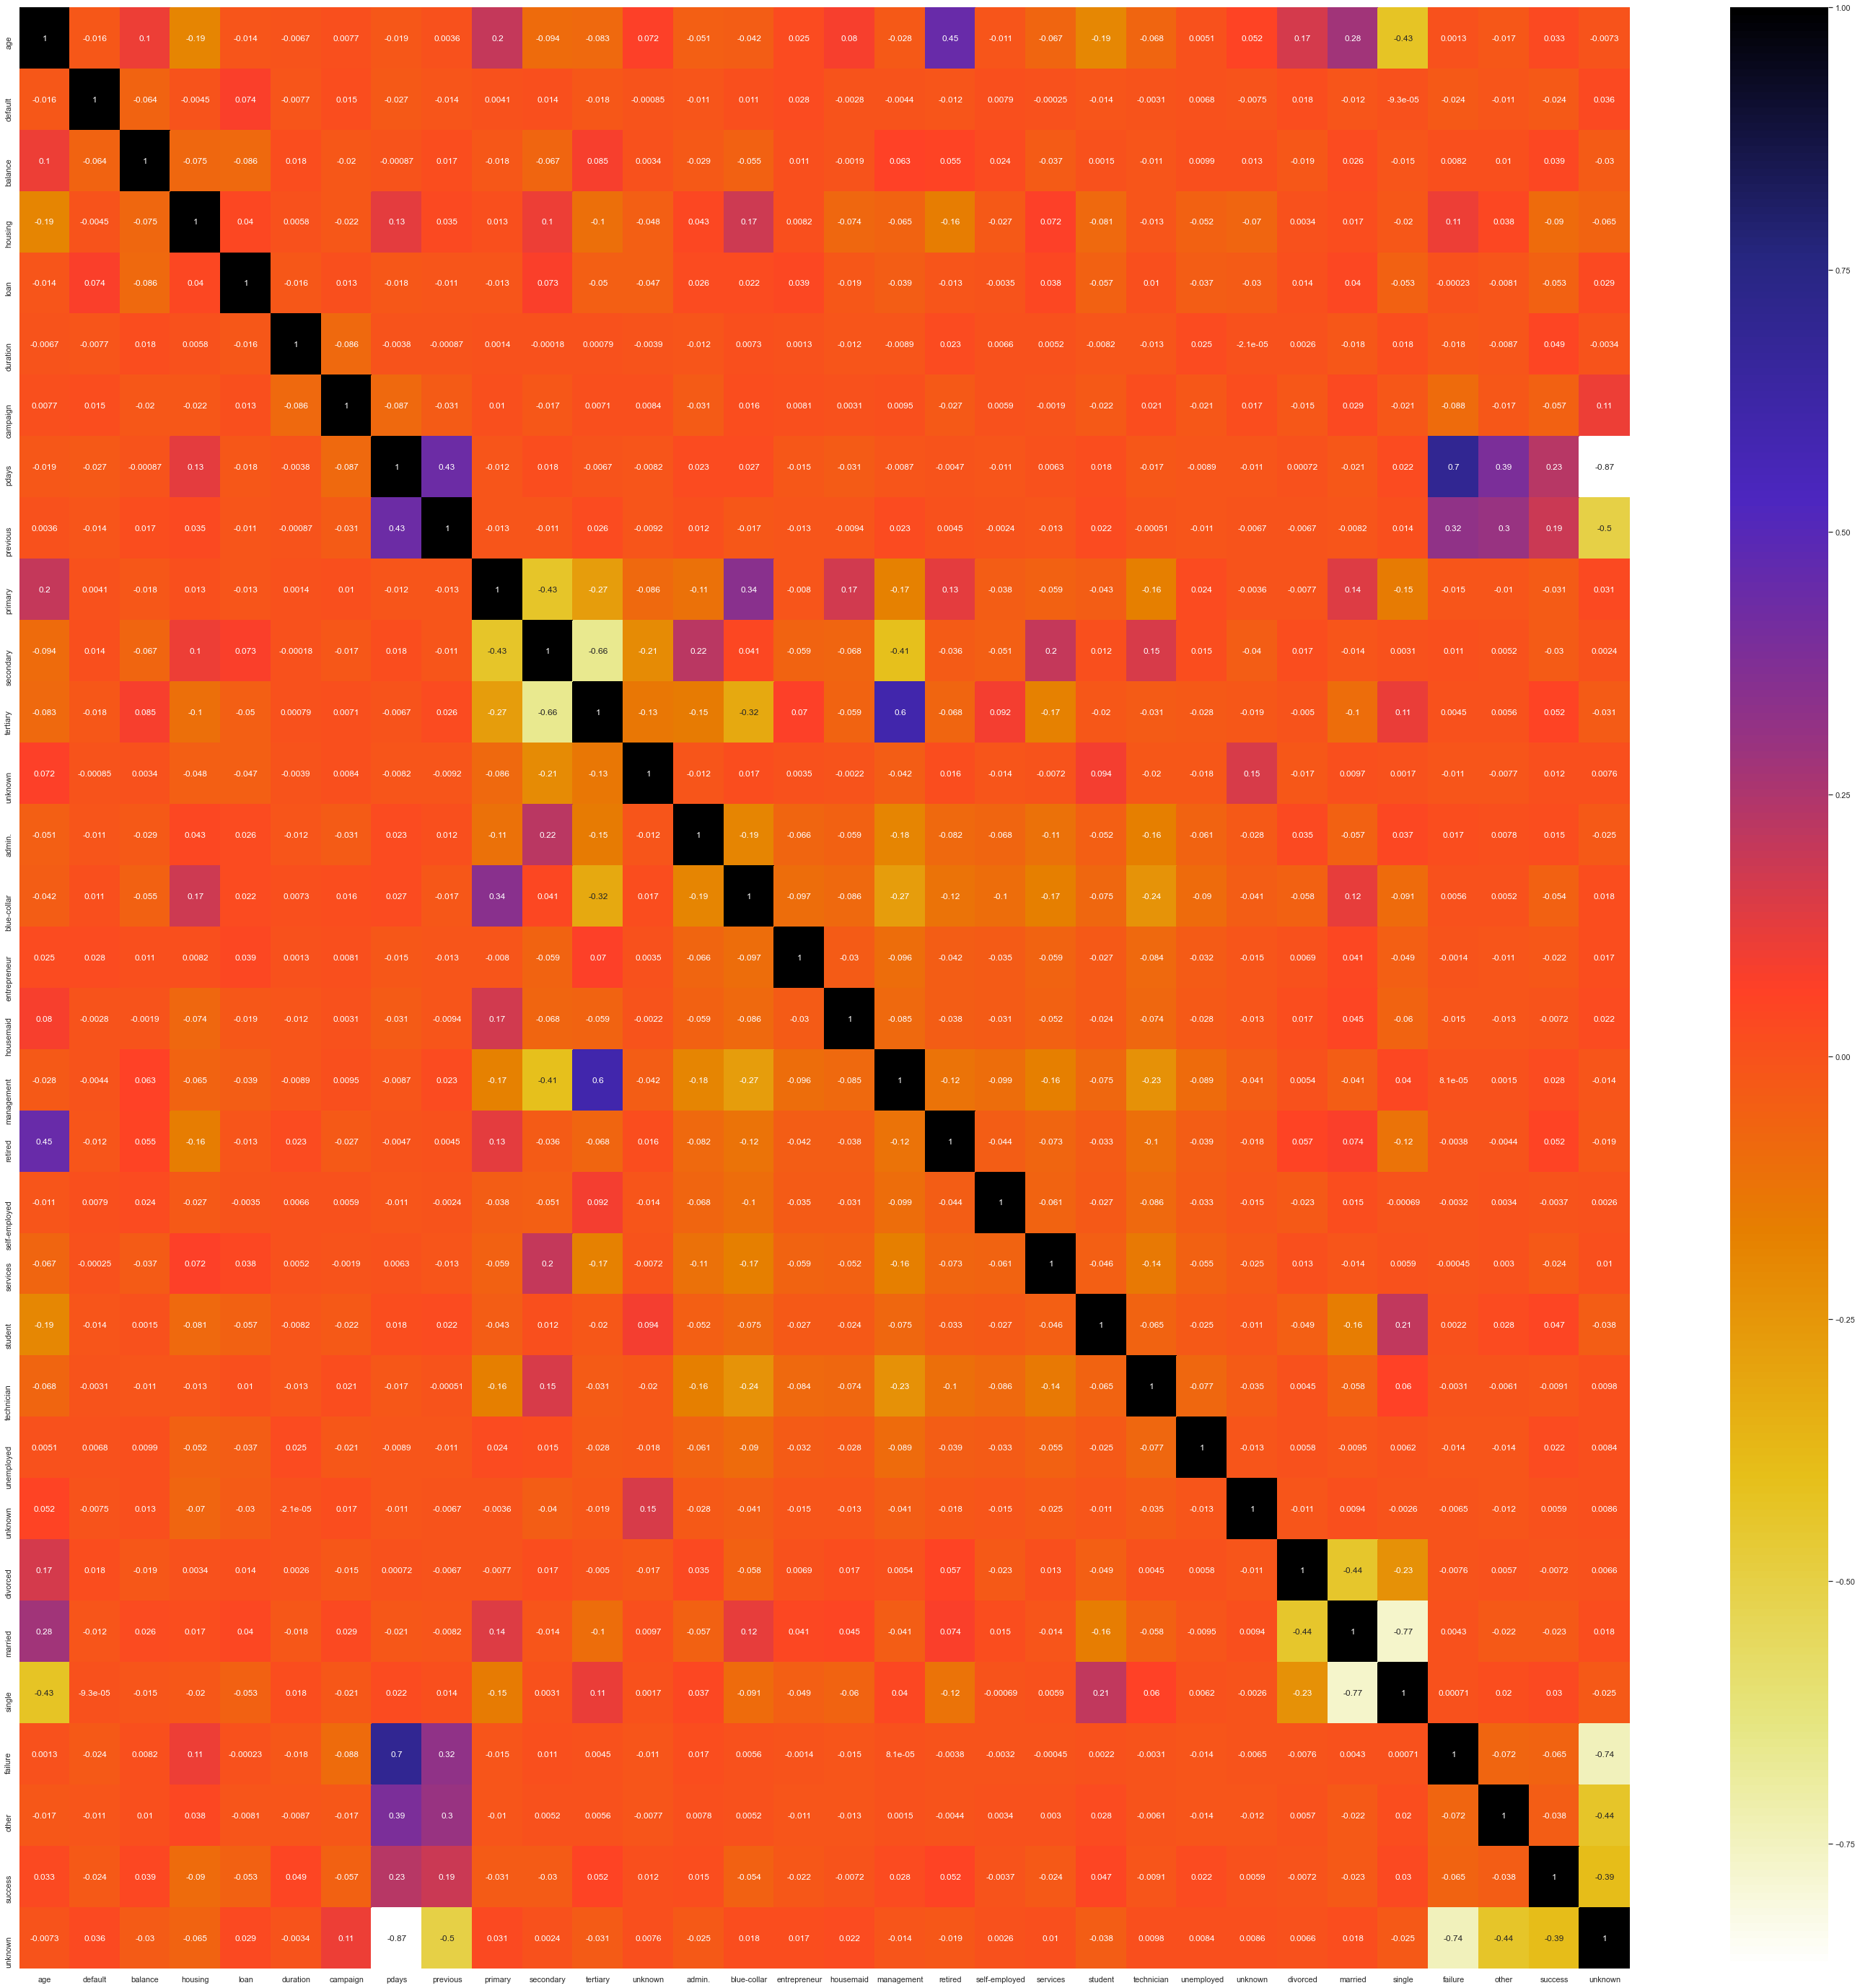

In [38]:
import seaborn as sns
#Using Pearson Correlation
#plt.figure(figsize=(12,10))
sns.set(rc = {'figure.figsize':(50,50)})
cor = X_train.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt

In [41]:
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [42]:
corr_features = correlation(X_train, 0.7)
len(set(corr_features))

2

In [43]:
corr_features

{'single', 'unknown'}

In [44]:
X_train.drop(corr_features,axis=1)
X_test.drop(corr_features,axis=1)

,age,default,balance,housing,loan,duration,campaign,pdays,previous,primary,...,self-employed,services,student,technician,unemployed,divorced,married,failure,other,success
14001,37,0,1403,1,0,91,15,-1,0,0,...,0,0,0,0,0,0,1,0,0,0
32046,36,0,-253,1,0,1073,1,-1,0,0,...,0,1,0,0,0,0,0,0,0,0
13318,47,0,-406,0,1,243,5,-1,0,1,...,0,0,0,0,0,0,1,0,0,0
42991,57,0,501,1,1,105,7,188,2,1,...,0,0,0,0,0,0,1,1,0,0
14237,33,1,-406,1,1,332,2,-1,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,31,0,0,1,1,164,2,-1,0,0,...,0,0,0,1,0,0,1,0,0,0
35730,48,0,5078,1,0,139,1,-1,0,0,...,0,0,0,0,0,0,1,0,0,0
11495,39,0,4,1,1,185,1,-1,0,0,...,0,0,0,0,0,0,1,0,0,0
20975,42,0,13410,0,1,149,2,-1,0,0,...,0,0,0,1,0,0,1,0,0,0


# checking corelation

                    age   default   balance   housing      loan  duration  \
age            1.000000 -0.017879  0.097783 -0.185513 -0.015655 -0.004648   
default       -0.017879  1.000000 -0.066745 -0.006025  0.077234 -0.010021   
balance        0.097783 -0.066745  1.000000 -0.068768 -0.084350  0.021560   
housing       -0.185513 -0.006025 -0.068768  1.000000  0.041323  0.005075   
loan          -0.015655  0.077234 -0.084350  0.041323  1.000000 -0.012412   
duration      -0.004648 -0.010021  0.021560  0.005075 -0.012412  1.000000   
campaign       0.004760  0.016822 -0.014578 -0.023599  0.009980 -0.084570   
pdays         -0.023758 -0.029979  0.003435  0.124178 -0.022754 -0.001565   
previous       0.001288 -0.018329  0.016674  0.037076 -0.011043  0.001203   
y              0.025155 -0.022419  0.052838 -0.139173 -0.068185  0.394521   
primary        0.196182  0.001623 -0.015451  0.010671 -0.012396 -0.003660   
secondary     -0.093979  0.013220 -0.069937  0.101659  0.070625  0.002084   

<module 'matplotlib' from 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\matplotlib\\__init__.py'>

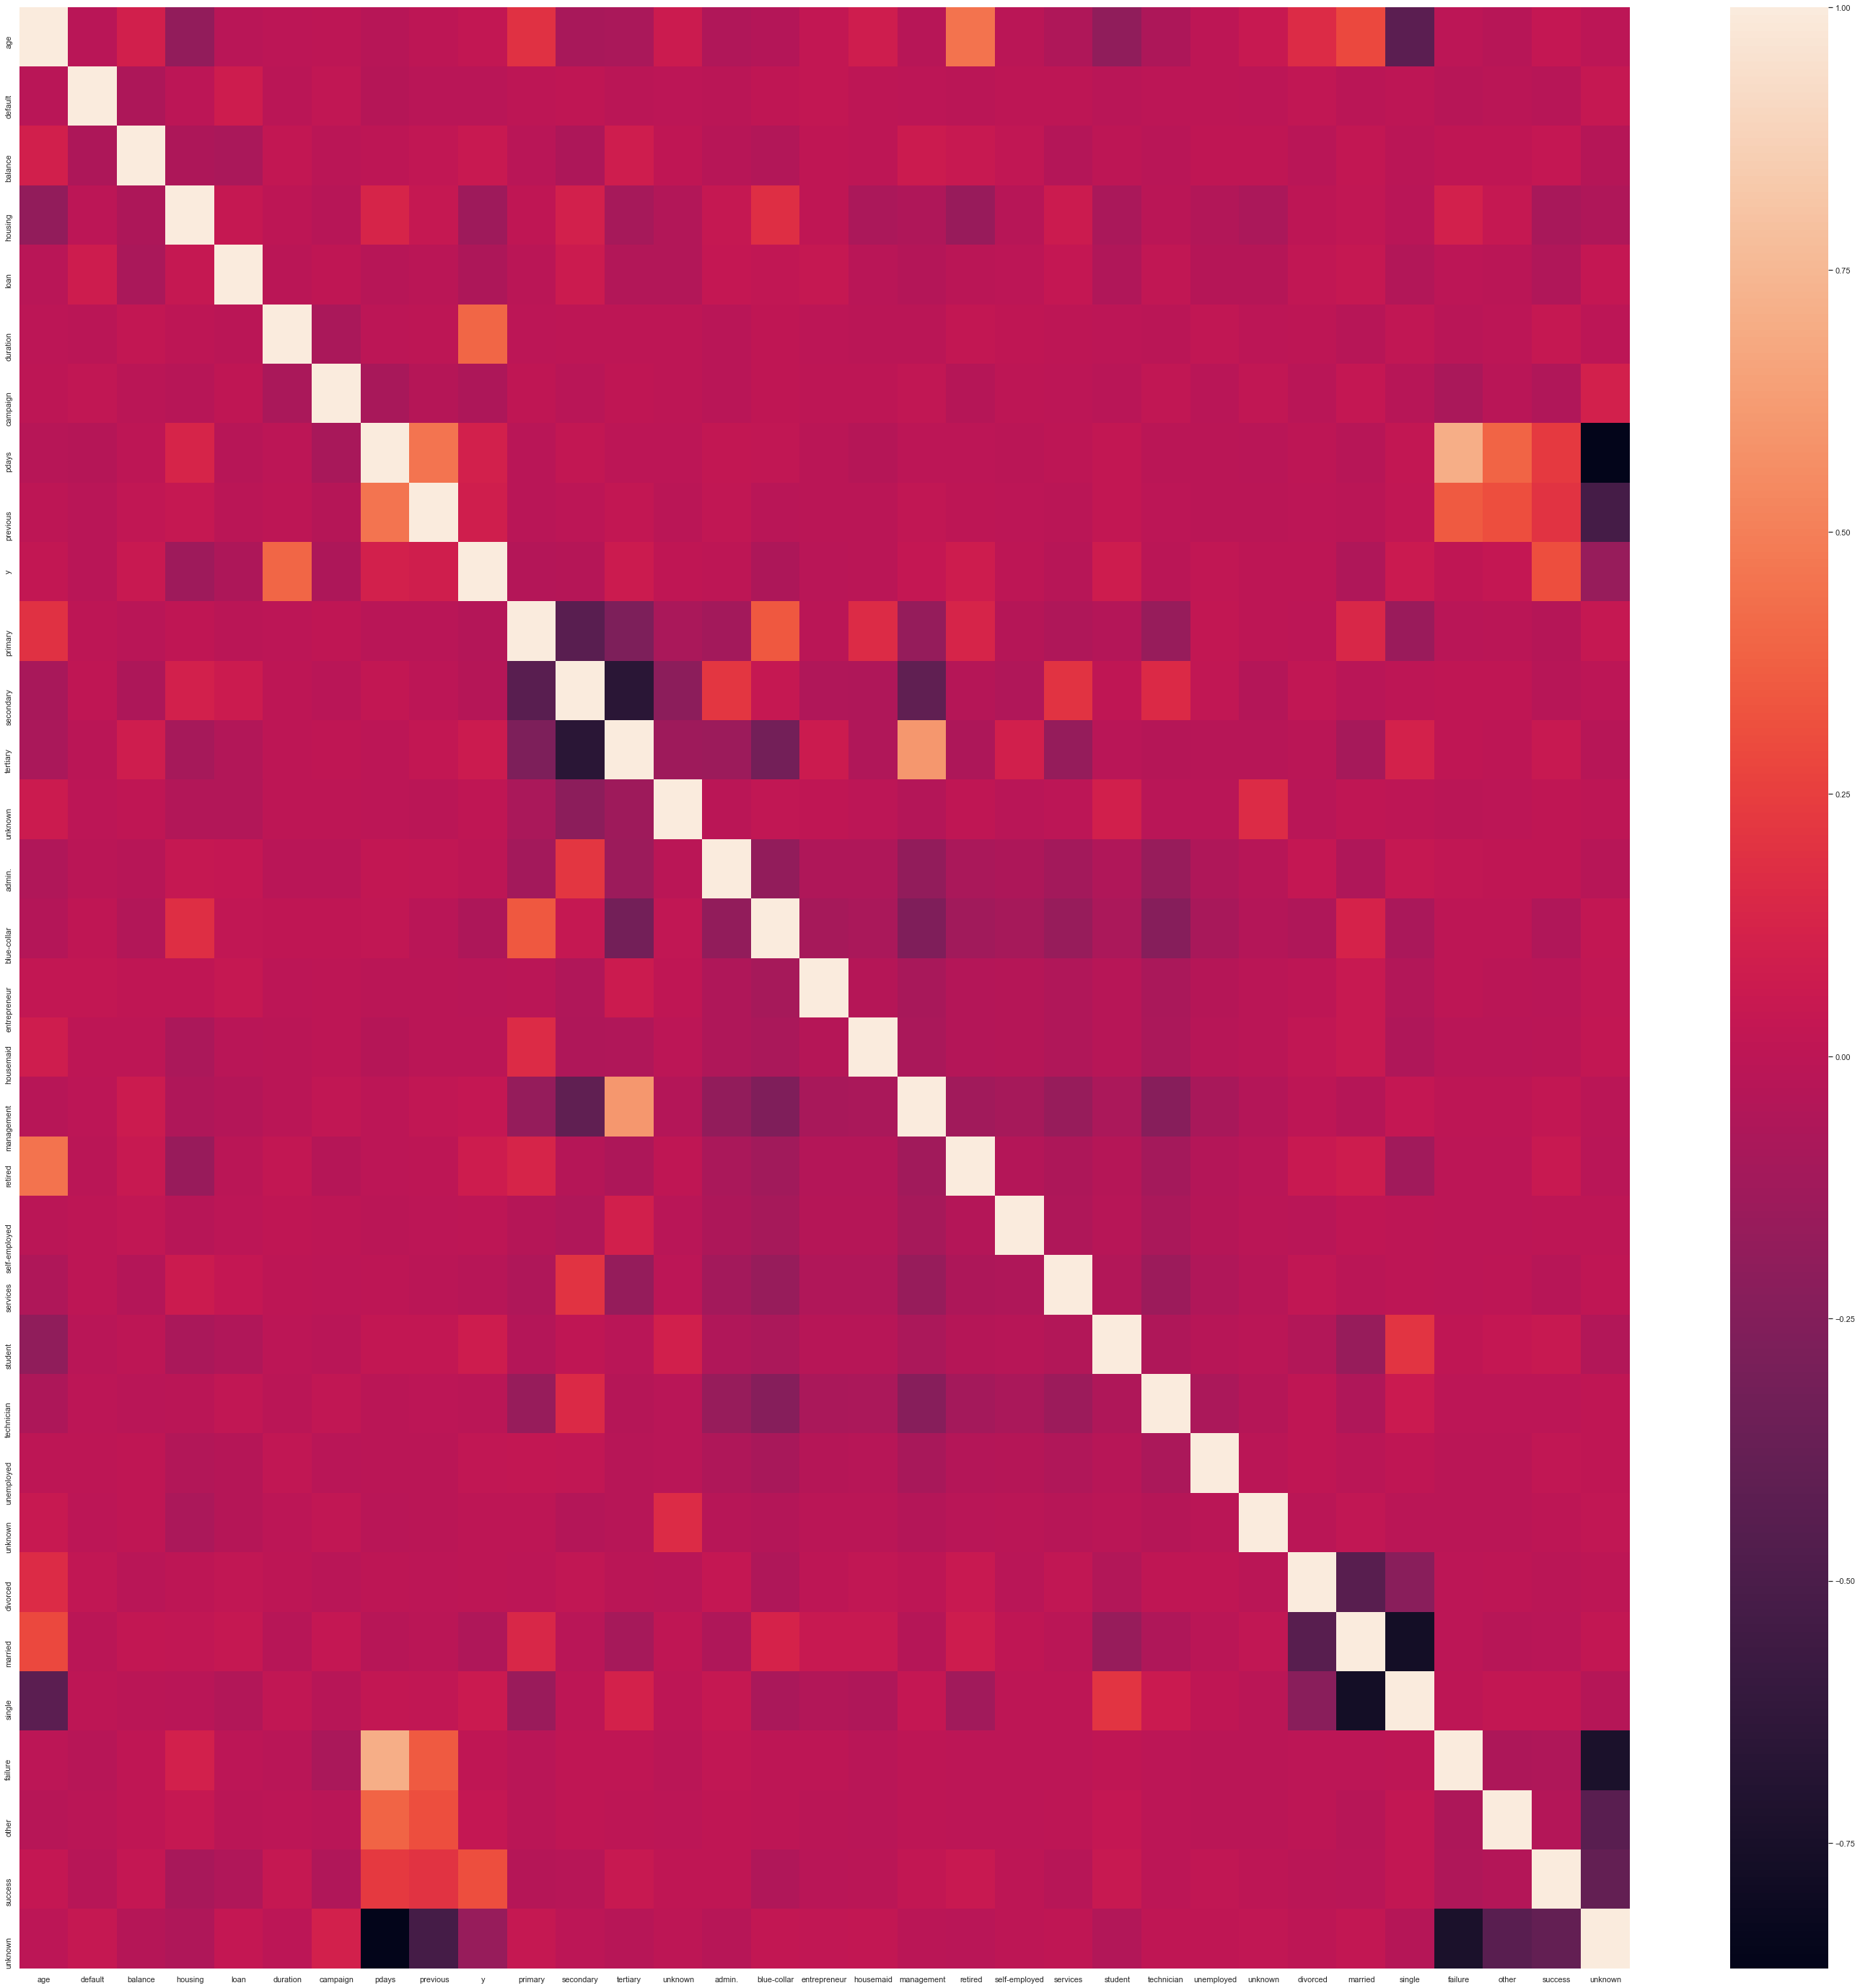

In [39]:
corr = Final.corr();
print(corr)
sns.set(rc = {'figure.figsize':(50,50)})
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns)
plt

#  spliting data 

In [22]:
# Now we will go for dependent and independent variables
# Dependent variable "Y"

y = Final.y
y.head()

0    0
1    0
2    0
3    0
4    0
Name: y, dtype: int64

In [23]:
# Independent variable "X"

x = Final.drop('y',axis = 1)
x.head()

,age,default,balance,housing,loan,duration,campaign,pdays,previous,primary,...,technician,unemployed,unknown,divorced,married,single,failure,other,success,unknown
0,58,0,2143,1,0,261,1,-1,0,0,...,0,0,0,0,1,0,0,0,0,1
1,44,0,29,1,0,151,1,-1,0,0,...,1,0,0,0,0,1,0,0,0,1
2,33,0,2,1,1,76,1,-1,0,0,...,0,0,0,0,1,0,0,0,0,1
3,47,0,1506,1,0,92,1,-1,0,0,...,0,0,0,0,1,0,0,0,0,1
4,33,0,1,0,0,198,1,-1,0,0,...,0,0,1,0,0,1,0,0,0,1


In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.1)

# Linear Regression

In [25]:
from sklearn.linear_model import LinearRegression
Linear = LinearRegression()
Linear.fit(X_train, y_train)

LinearRegression()

In [26]:
Linear.predict(X_test)

array([ 0.07430451,  0.04636497,  0.17267478, ...,  0.19502357,
       -0.02080547,  0.56774865])

In [27]:
Linear.score(X_test,y_test)

0.2736330374527257

# Logistic Regression

In [28]:
from sklearn.linear_model import LogisticRegression
Logistic = LogisticRegression()

In [29]:
Logistic.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [30]:
X_test.head()

,age,default,balance,housing,loan,duration,campaign,pdays,previous,primary,...,technician,unemployed,unknown,divorced,married,single,failure,other,success,unknown
24135,48,0,15,0,0,88,1,-1,0,0,...,0,0,0,1,0,0,0,0,0,1
20716,38,0,4723,1,0,187,2,-1,0,0,...,1,0,0,0,0,1,0,0,0,1
7828,38,0,580,1,0,572,6,-1,0,1,...,0,0,0,0,1,0,0,0,0,1
31658,32,0,948,1,0,223,2,-1,0,0,...,1,0,0,0,0,1,0,0,0,1
38614,31,0,1803,1,0,350,8,360,1,0,...,0,0,0,0,1,0,1,0,0,0


In [31]:
y_predicted = Logistic.predict(X_test)
y_predicted

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [32]:
Logistic.predict_proba(X_test)

array([[0.86661201, 0.13338799],
       [0.96759468, 0.03240532],
       [0.95808649, 0.04191351],
       ...,
       [0.91584285, 0.08415715],
       [0.9788169 , 0.0211831 ],
       [0.66628365, 0.33371635]])

In [33]:
# accuracy
Logistic.score(X_test,y_test)

0.8907563025210085

# Prediction through Decision Tree

In [34]:
from sklearn.tree import DecisionTreeClassifier
Decision = DecisionTreeClassifier()
Decision.fit(X_test,y_test)

DecisionTreeClassifier()

In [35]:
Decision.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [36]:
# Accuracy
Decision.score(X_test,y_test)

1.0

# Prediction through Random Forest Classifier

In [37]:
from sklearn.ensemble import RandomForestClassifier
Random = RandomForestClassifier(n_estimators=20)
Random.fit(X_train, y_train)

RandomForestClassifier(n_estimators=20)

In [38]:
Random.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [39]:
# Accuracy
Random.score(X_test, y_test)

0.8942945599292349

# Prediction through SVM

In [40]:
from sklearn.preprocessing import MinMaxScaler
scaling = MinMaxScaler(feature_range=(-1,1)).fit(X_train)
X_train = scaling.transform(X_train)
X_test = scaling.transform(X_test)

In [41]:
from sklearn.svm import SVC
svm = SVC(kernel = 'linear', random_state = 0)
svm.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

In [42]:
svm.predict(X_test)

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [43]:
Y_pred = svm.predict(X_test)
Y_pred

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [44]:
# Accuracy
svm.score(X_test, y_test)

0.8940734188412207

# Train using Bagging

In [45]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

scores = cross_val_score(DecisionTreeClassifier(),  y, cv=5)
scores

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 591, in _fit_and_score
    estimator.fit(X_train, **fit_params)
TypeError: fit() missing 1 required positional argument: 'y'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 591, in _fit_and_score
    estimator.fit(X_train, **fit_params)
TypeError: fit() missing 1 required positio

array([nan, nan, nan, nan, nan])

In [46]:
# Now as you can see that the bagging calssifier gave 89% accuracy which is greater then SVM
from sklearn.ensemble import BaggingClassifier

bag_model = BaggingClassifier(
    base_estimator=DecisionTreeClassifier(), 
    n_estimators=100, 
    max_samples=0.8, 
    oob_score=True,
    random_state=0
)
bag_model.fit(X_train, y_train)
bag_model.oob_score_

0.8976381823097151

In [47]:
# Look at the difference
bag_model.score(X_test, y_test)

0.8954002653693056

In [48]:
bag_model = BaggingClassifier(
    base_estimator=DecisionTreeClassifier(), 
    n_estimators=100, 
    max_samples=0.8, 
    oob_score=True,
    random_state=0
)
scores = cross_val_score(bag_model, x, y, cv=5)
scores

array([0.89229238, 0.88553417, 0.87967264, 0.87569122, 0.73125415])

# Principal Component Analysis PCA

In [49]:
# we will again scale the data for PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(x)
X_scaled

array([[ 1.60696496, -0.13548989,  0.25641925, ..., -0.20597248,
        -0.185948  ,  0.47251925],
       [ 0.28852927, -0.13548989, -0.43789469, ..., -0.20597248,
        -0.185948  ,  0.47251925],
       [-0.74738448, -0.13548989, -0.44676247, ..., -0.20597248,
        -0.185948  ,  0.47251925],
       ...,
       [ 2.92540065, -0.13548989,  1.42959305, ..., -0.20597248,
         5.37784754, -2.11631591],
       [ 1.51279098, -0.13548989, -0.22802402, ..., -0.20597248,
        -0.185948  ,  0.47251925],
       [-0.37068857, -0.13548989,  0.52836436, ...,  4.85501757,
        -0.185948  , -2.11631591]])

In [50]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=30)

In [51]:
# Score is quite amazing
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.8991485126617274

In [52]:
# to reduce dimentions
from sklearn.decomposition import PCA

pca = PCA(0.95)
X_pca = pca.fit_transform(x)
X_pca.shape

(45211, 1)

In [53]:
pca.explained_variance_ratio_

array([0.99182156])

In [54]:
pca.n_components_

1

In [55]:
X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=30)

In [56]:
# with PCA, accuracy is 88%
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train_pca, y_train)
model.score(X_test_pca, y_test)

0.885989162888422

# Finding best model and hyper parameter tunning using GridSearchCV

# Approach 2: Use K Fold Cross validation
Manually try suppling models with different parameters to cross_val_score function with 5 fold cross validation

In [57]:
from sklearn import svm
model = svm.SVC(kernel='rbf',C=30,gamma='auto')
model.fit(X_train,y_train)
model.score(X_test, y_test)

0.895388698440783

In [58]:
# checking for C = 10 only
cross_val_score(svm.SVC(kernel='linear',C=10,gamma='auto'), X_test,y_test, cv=5)

array([0.89386401, 0.89662797, 0.88999447, 0.8960177 , 0.89380531])

In [61]:
cross_val_score(svm.SVC(kernel='rbf',C=10,gamma='auto'), X_test,y_test, cv=5)

array([0.89386401, 0.89275843, 0.8944168 , 0.89269912, 0.89325221])

# Use GridSearchCV
GridSearchCV does exactly same thing as for loop above but in a single line of code

In [1]:
from sklearn.model_selection import RandomizedSearchCV

rs = RandomizedSearchCV(svm.SVC(gamma='auto'), {
        'C': [1,10,20],
        'kernel': ['rbf','linear']
    }, 
    cv=5, 
    return_train_score=False, 
    n_iter=2
)
rs.fit(X_test, y_test)
pd.DataFrame(rs.cv_results_)[['param_C','param_kernel','mean_test_score']]

NameError: name 'svm' is not defined